<h1>Exploratory Analysis</h1>

<p>For referring the problem and the dataset : https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot</p>

<h3>Loading Libraries and Dataset</h3>

In [2]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import *
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#loading the Dataset
df_bid = pd.read_csv('D:\\Data_Classification_using_ML_(good_vs_bad)\\Description_Heuristics_E&A\\Dataset\\bids.csv')
df_train = pd.read_csv( 'D:\\Data_Classification_using_ML_(good_vs_bad)\\Description_Heuristics_E&A\\Dataset\\train.csv' )

<h4>Simplifying the Device feature</h4>

In [8]:
#making the string simpler
df_bid[ 'device' ] = df_bid['device'].map( lambda x: x.lstrip('phone') )

<h4>Time Offset</h4>
<p>Subtracting all the bidding_times by its minimum value( the first bidding_time )</p>

In [9]:
#normalising time by subtracting it from its minimum value( the first bidding_time )
df_bid[ 'time' ] -= df_bid[ 'time' ].min( )

df_bid

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,0,0.000000e+00,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,1,0.000000e+00,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,2,0.000000e+00,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,4,0.000000e+00,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,5,0.000000e+00,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,7,0.000000e+00,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,2,0.000000e+00,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,8,0.000000e+00,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,9,0.000000e+00,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,4,0.000000e+00,za,123.28.123.226,vasstdc27m7nks3


<p>Merging values of the Sample_Bids and the train_data_set</p>

In [10]:
#merging values of the Sample_Bids and the train_data_set
merged = pd.merge(left=df_bid,right=df_train,left_on='bidder_id',right_on='bidder_id',how='right')

In [11]:
merged

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,1.0,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,1,0.000000e+00,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
1,25.0,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,4,0.000000e+00,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
2,39.0,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,35,0.000000e+00,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
3,42.0,668d393e858e8126275433046bbd35c6tywop,jkyzt,furniture,38,0.000000e+00,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
4,68.0,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,57,0.000000e+00,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
5,85.0,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,57,0.000000e+00,id,78.177.183.67,oie0vw631m425f3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
6,140.0,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,94,0.000000e+00,in,185.104.4.204,4nhf4369ida6ugl,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
7,168.0,668d393e858e8126275433046bbd35c6tywop,19fz7,furniture,4,0.000000e+00,in,88.188.164.92,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
8,225.0,668d393e858e8126275433046bbd35c6tywop,ligr3,furniture,3,0.000000e+00,br,228.169.174.49,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
9,239.0,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,45,0.000000e+00,in,179.141.53.31,xkrb30014k3boqg,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0


Merged Dataframe's Nan values are replaced with median values of the same, instead of removing them, to get a better estimate while training the model.
<b>Not while doing exploratory analysis.</b>

Splitting the values of the dataset and defining the humans dataset.

In [430]:
#splitting the values of the dataset and defining the humans part
human = merged.loc[ merged[ 'outcome' ] == 0 ]
human

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,1.0,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9.759240e+15,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
1,25.0,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone4,9.759240e+15,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
2,39.0,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone35,9.759240e+15,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
3,42.0,668d393e858e8126275433046bbd35c6tywop,jkyzt,furniture,phone38,9.759240e+15,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
4,68.0,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,phone57,9.759240e+15,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
5,85.0,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone57,9.759240e+15,id,78.177.183.67,oie0vw631m425f3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
6,140.0,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,phone94,9.759240e+15,in,185.104.4.204,4nhf4369ida6ugl,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
7,168.0,668d393e858e8126275433046bbd35c6tywop,19fz7,furniture,phone4,9.759240e+15,in,88.188.164.92,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
8,225.0,668d393e858e8126275433046bbd35c6tywop,ligr3,furniture,phone3,9.759240e+15,br,228.169.174.49,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0
9,239.0,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone45,9.759240e+15,in,179.141.53.31,xkrb30014k3boqg,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0


Splitting the values of the dataset and defining the robots dataset.

In [431]:
#splitting the values of the dataset and defining the robots part
robot = merged.loc[ merged[ 'outcome' ] == 1 ]
robot

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
151640,20.0,af9c96944265cf541b3fe734a057821a825l7,jtxiv,office equipment,phone19,9.759240e+15,hr,144.100.75.92,vasstdc27m7nks3,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151641,1676.0,af9c96944265cf541b3fe734a057821a825l7,boegs,office equipment,phone28,9.759250e+15,za,154.47.178.87,w3e6zyc2viukywk,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151642,2274.0,af9c96944265cf541b3fe734a057821a825l7,boegs,office equipment,phone28,9.759260e+15,za,112.118.200.189,4gsm9x5dszapvfm,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151643,3503.0,af9c96944265cf541b3fe734a057821a825l7,boegs,office equipment,phone6,9.759260e+15,uk,125.18.241.183,marpl1l6rn3293p,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151644,3533.0,af9c96944265cf541b3fe734a057821a825l7,boegs,office equipment,phone110,9.759260e+15,za,32.44.186.106,zbwltys55uo8rau,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151645,4895.0,af9c96944265cf541b3fe734a057821a825l7,ctfha,office equipment,phone693,9.759270e+15,sc,137.128.101.123,vasstdc27m7nks3,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151646,11651.0,af9c96944265cf541b3fe734a057821a825l7,boegs,office equipment,phone28,9.759280e+15,za,21.36.31.21,5tex3767kzfgbf9,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151647,15161.0,af9c96944265cf541b3fe734a057821a825l7,7mkw3,office equipment,phone439,9.759290e+15,it,47.3.150.147,2a1o3v8juc83vdr,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151648,18224.0,af9c96944265cf541b3fe734a057821a825l7,opbt4,office equipment,phone35,9.759300e+15,ng,166.130.186.247,vasstdc27m7nks3,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151649,20189.0,af9c96944265cf541b3fe734a057821a825l7,5ddeo,office equipment,phone573,9.759310e+15,us,205.235.231.87,lhtqvqlxise9dow,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1


<h4>Individual Time Offset</h4>
<p>Subtracting the bidding_time of each of the individual bidder with the minimum time at which the bidder made the first bid.</p>
<p>Therefore, each bidder's bidding times start from 0.</p>
<p>This makes us identify and analyse the difference in time instead of the actual time: might be hard to indentify a feature.</p>

<h3>Dimensionality Reduction</h3>
<p>
<b>Missing Value Ratio</b></p>
<p>Taking all the mapped values from the train dataset, excluding the NaN values.( for humans as well as robots )</p>

Unique Bidder Ids of Robots and Humans

In [432]:
robot_0 = robot[ "bidder_id" ].unique( )
human_0 = human[ "bidder_id" ].unique( )

In [433]:
#subtracting the time from each of the individual bidder with the minimum time at which the bidder made the bid( the first 
# bid )
# Therefore, each bidder's bidding times start from 0.
#This makes us identify and analyse the difference in time instead of the actual time : might be hard to indentify a feature

for t in robot_0 :
    robot.loc[ robot[ 'bidder_id' ]==t ].time -= robot.loc[ robot[ 'bidder_id' ]==t ].time.min()

for t in human_0 :
    human.loc[ human[ 'bidder_id' ]==t ].time -= human.loc[ human[ 'bidder_id' ]==t ].time.min()


C:\Users\srajpal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [435]:
robot

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
151640,20.0,af9c96944265cf541b3fe734a057821a825l7,jtxiv,office equipment,phone19,9.759240e+15,hr,144.100.75.92,vasstdc27m7nks3,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151641,1676.0,af9c96944265cf541b3fe734a057821a825l7,boegs,office equipment,phone28,9.759250e+15,za,154.47.178.87,w3e6zyc2viukywk,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151642,2274.0,af9c96944265cf541b3fe734a057821a825l7,boegs,office equipment,phone28,9.759260e+15,za,112.118.200.189,4gsm9x5dszapvfm,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151643,3503.0,af9c96944265cf541b3fe734a057821a825l7,boegs,office equipment,phone6,9.759260e+15,uk,125.18.241.183,marpl1l6rn3293p,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151644,3533.0,af9c96944265cf541b3fe734a057821a825l7,boegs,office equipment,phone110,9.759260e+15,za,32.44.186.106,zbwltys55uo8rau,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151645,4895.0,af9c96944265cf541b3fe734a057821a825l7,ctfha,office equipment,phone693,9.759270e+15,sc,137.128.101.123,vasstdc27m7nks3,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151646,11651.0,af9c96944265cf541b3fe734a057821a825l7,boegs,office equipment,phone28,9.759280e+15,za,21.36.31.21,5tex3767kzfgbf9,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151647,15161.0,af9c96944265cf541b3fe734a057821a825l7,7mkw3,office equipment,phone439,9.759290e+15,it,47.3.150.147,2a1o3v8juc83vdr,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151648,18224.0,af9c96944265cf541b3fe734a057821a825l7,opbt4,office equipment,phone35,9.759300e+15,ng,166.130.186.247,vasstdc27m7nks3,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1
151649,20189.0,af9c96944265cf541b3fe734a057821a825l7,5ddeo,office equipment,phone573,9.759310e+15,us,205.235.231.87,lhtqvqlxise9dow,3e9073fb9219ceb4a1dc9dbb9e1acbe9dgj47,2367520c8d94e70f47f4e28e72004ef9kv3c5,1


<b>Humans to Robots</b>
<p>Plotting the number of unique_bidders of robots and humans, to get a picture of their ratio.</p>

Text(0.5,1,'Unique_Bidders')

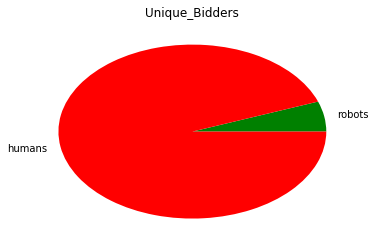

In [14]:
plt.pie( [ len( robot[ 'bidder_id' ].unique( ) ) , len( human[ 'bidder_id' ].unique( ) ) ] , labels = [ 'robots' , 'humans' ] , colors = [ 'g' , 'r' ] )
plt.title( 'Unique_Bidders' )

Unique_Robots : 42 

Unique_Humans : 707

Plotting the number of bids by robots and humans, to prove the fact that average number of bids is more for robots.

Text(0.5,1,'Total Bids')

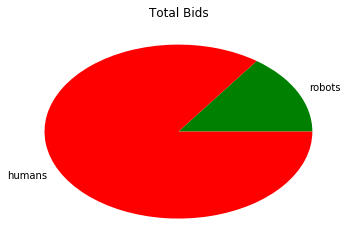

In [15]:
plt.pie( [ len( robot ) , len( human ) ] , labels = [ 'robots' , 'humans' ] , colors = [ 'g' , 'r' ] )
plt.title( 'Total Bids' )

Unique_Robots : 61603
Unique_Humans : 347088

Since the percentage of bids by robots is more than the number of bidders(almost thrice), it proves the fact that robots have more average number of bids.

<p>Average number of bids by robot : 1466</p>
<p>Average number of bids by human : 490</p>

In [16]:
robot_1 = robot.groupby( [ "bidder_id" ] ).nunique( )

human_1 = human.groupby( [ "bidder_id" ] ).nunique( )

<b><p>Humans are way more in number and thus do take into account the population bias towards humans while examining plots.</p></b>

We are examing the number_of_bids by humans and the robots in order to get their mean and median values of the number of bids.

Text(0.5,1,'Total bids by each unique robot')

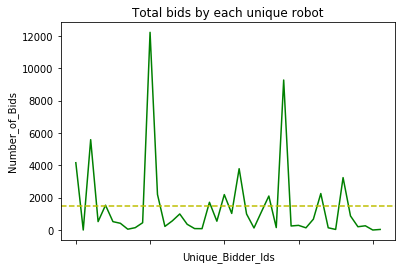

In [17]:
robot_1[ 'bid_id' ].plot( color = 'g' )
plt.axhline( y = robot_1[ 'bid_id' ].mean( ) , color='y', linestyle='--')
plt.xlabel( 'Unique_Bidder_Ids' )
plt.ylabel( 'Number_of_Bids' )
plt.title( 'Total bids by each unique robot' )

Text(0.5,1,'Total bids by each unique human.')

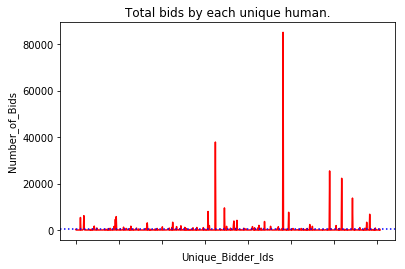

In [18]:
human_1[ 'bid_id' ].plot( color = 'r' )
plt.axhline( y = human_1[ 'bid_id' ].mean( ) , color='b', linestyle=':')
plt.xlabel( 'Unique_Bidder_Ids' )
plt.ylabel( 'Number_of_Bids' )
plt.title( 'Total bids by each unique human.' )

Text(0.5,1,'Total bids by each unique bidder.')

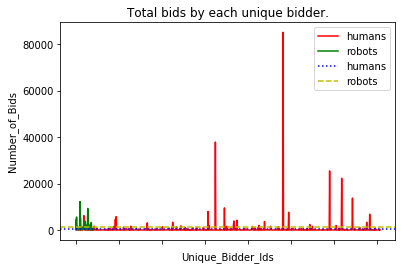

In [19]:
human_1[ 'bid_id' ].plot( color = 'r' , label = 'humans' ) 
robot_1[ 'bid_id' ].plot( color = 'g' , label = 'robots' )
plt.axhline( y = human_1[ 'bid_id' ].mean( ) , color='b' , linestyle=':' , label = 'humans')
plt.axhline( y = robot_1[ 'bid_id' ].mean( ) , color='y' , linestyle='--' , label = 'robots')
plt.legend( )
plt.xlabel( 'Unique_Bidder_Ids' )
plt.ylabel( 'Number_of_Bids' )
plt.title( 'Total bids by each unique bidder.' )

<p>As can be implied from the graph, humans have the maxima of the number of bids, but still the mean number of bids by any individual tends to be much more for robots, because humans tends to have more outliers.( more random than robots )</p>
<p>As is visible from the graph, robots on average bid more than humans.</p>

<h4>Examining Merchandise</h4>
<p>We examine the merchandise to check if their is any bias of humans or robots towards certain merchandise and whether their are any merchandise which are bid on only by Humans or Robots.</p>
<p>Robots probably won't go for human recreational merchandise like Jewelery , Clothing.</p>

In [20]:
robot[ 'merchandise' ].unique( )

array(['office equipment', 'mobile', 'home goods', 'sporting goods',
       'computers', 'jewelry', 'books and music'], dtype=object)

<p>Robots merchandise</p>

In [21]:
human[ 'merchandise' ].unique( )

array(['furniture', 'mobile', 'sporting goods', 'home goods', 'jewelry',
       'office equipment', 'books and music', 'auto parts', 'computers',
       'clothing'], dtype=object)

Humans merchandise

Auto_parts , Furniture , Clothing Only bid by humans.

<p>On examining the merchandise, we get to know that Robots don't bid on</p>
<ul>
<li>Auto_Parts</li>
<li>Furniture</li>
<li>Clothing</li>
</ul>
<p>Humans are the only ones to do so.</p>

<h4>Variety of Merchandise Targeted</h4>
<p>We inspect the fact that humans or robots target one or multiple merchandise.</p>
<p>Humans admire variety and robots are good at multi-tasking so we expect both of them to target multiple <i>Merchandise</i>.</p>

Text(0.5,1,'Number_of_Unique_Merchandises_bid_by_robots')

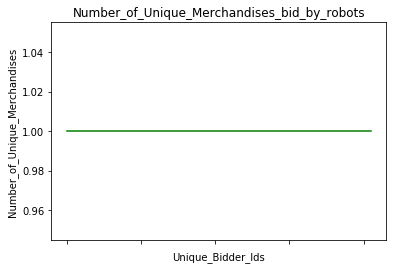

In [23]:
robot_1[ "merchandise" ].plot( color = 'g' )
plt.xlabel( 'Unique_Bidder_Ids' )
plt.ylabel( 'Number_of_Unique_Merchandises' )
plt.title( 'Number_of_Unique_Merchandises_bid_by_robots' )

Text(0.5,1,'Number_of_Unique_Merchandises_bid_by_humans')

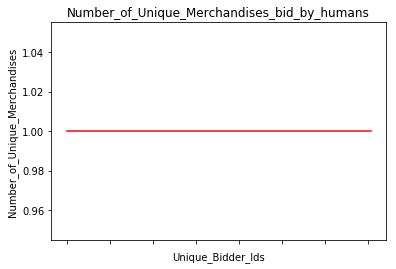

In [24]:
human_1[ "merchandise" ].plot( color = 'r' )
plt.xlabel( 'Unique_Bidder_Ids' )
plt.ylabel( 'Number_of_Unique_Merchandises' )
plt.title( 'Number_of_Unique_Merchandises_bid_by_humans' )

As can be implied from the graph, all the humans and robots always target a single merchandise, with no exception.

<h4>Variety of Devices</h4>
<p>We examine the devices to see if certain devices are used by just humans or robots.</p> 
<p>We expect costly and hard to manipualte phones to be used just by humans.</p>

In [25]:
robot_3 = robot.groupby( [ "device" ] ).nunique( )

human_3 = human.groupby( [ "device" ] ).nunique( )

Text(0.5,1,'Device_IDs_used_by_robots')

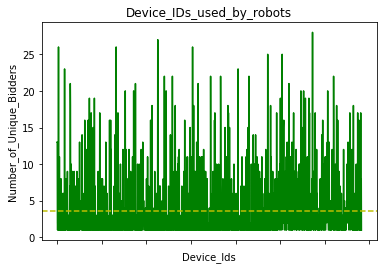

In [26]:
robot_3[ "bidder_id" ].plot( color = 'g' ) 
plt.axhline( y = robot_3[ 'bidder_id' ].mean( ) , color='y', linestyle='--')
plt.xlabel( 'Device_Ids' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Device_IDs_used_by_robots' )

Text(0.5,1,'Device_IDs_used_by_humans')

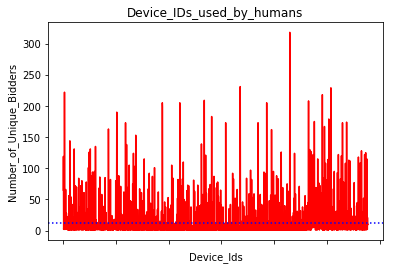

In [27]:
human_3[ "bidder_id" ].plot( color = 'r' )
plt.axhline( y = human_3[ 'bidder_id' ].mean( ) , color='b', linestyle=':')
plt.xlabel( 'Device_Ids' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Device_IDs_used_by_humans' )

Text(0.5,1,'Device_IDs_used_by_bidders')

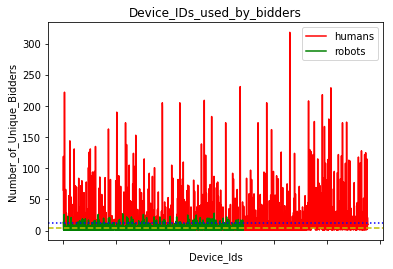

In [28]:
human_3[ "bidder_id" ].plot( color = 'r' , label = 'humans' )
robot_3[ "bidder_id" ].plot( color = 'g' , label = 'robots' )
plt.axhline( y = robot_3[ 'bidder_id' ].mean( ) , color='y', linestyle='--')
plt.axhline( y = human_3[ 'bidder_id' ].mean( ) , color='b', linestyle=':')
plt.legend( )
plt.xlabel( 'Device_Ids' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Device_IDs_used_by_bidders' )

As can be implied from the graph, certain device_ids are used just by humans.

<h4>Variety of IPs</h4>
<p>We expect robots to be using more variety of IPs, because they are more likely to use proxies or firewall. Humans usually don't do that.</p>
<p>To inspect the same, we plot them.</p>
<p>Since, ips are obfuscated, it can't be used to map it back to its country and remove the country feature. In fact, the same holds for url as well, so we can trace down url's to a particular country( certain url's are accessible in few countries only ).</p>

In [29]:
robot_4 = robot.groupby( [ "ip" ] ).nunique( )

human_4 = human.groupby( [ "ip" ] ).nunique( )

Text(0.5,1,'Ips_used_by_robots')

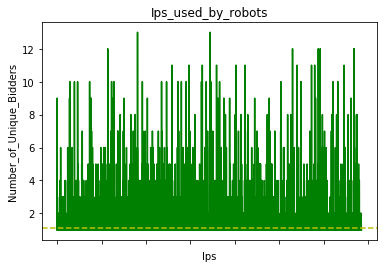

In [30]:
robot_4[ "bidder_id" ].plot( color = 'g' )
plt.axhline( y = robot_4[ 'bidder_id' ].mean( ) , color='y', linestyle='--')
plt.xlabel( 'Ips' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Ips_used_by_robots' )

Text(0.5,1,'Ips_used_by_humans')

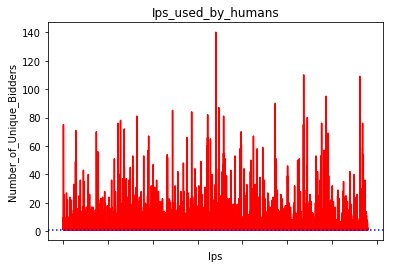

In [31]:
human_4[ "bidder_id" ].plot( color = 'r' )
plt.axhline( y = human_4[ 'bidder_id' ].mean( ) , color='b', linestyle=':')
plt.xlabel( 'Ips' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Ips_used_by_humans' )

Text(0.5,1,'Ips_used_by_bidders')

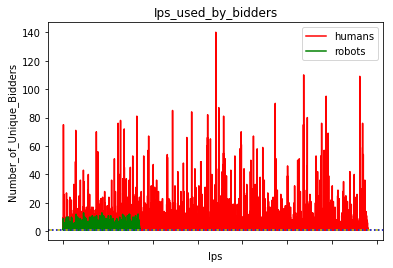

In [32]:
human_4[ "bidder_id" ].plot( color = 'r' , label = 'humans' ) # blue
robot_4[ "bidder_id" ].plot( color = 'g' , label = 'robots' ) # orange
plt.axhline( y = robot_4[ 'bidder_id' ].mean( ) , color='y', linestyle='--')
plt.axhline( y = human_4[ 'bidder_id' ].mean( ) , color='b', linestyle=':')
plt.legend( )
plt.xlabel( 'Ips' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Ips_used_by_bidders' )

<p>We get a contradictory result to our hypothesis and humans use a wide variety of ips, while robots just use a fraction of it.</p>

<b>Variety of Auctions</b>
<p>We expect the humans to be equally likely as robots for any auctions.</p>
<p>To inspect the same we plot the graph.</p>

In [33]:
robot_5 = robot.groupby( [ "auction" ] ).nunique( )

human_5 = human.groupby( [ "auction" ] ).nunique( )

Text(0.5,1,'Auction_IDs_bid_on_by_robots')

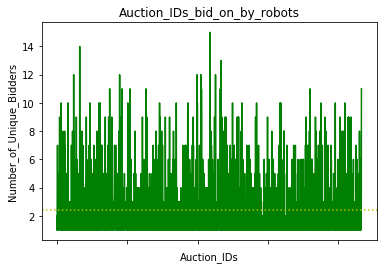

In [34]:
robot_5[ "bidder_id" ].plot( color = 'g' )
plt.axhline( y = robot_5[ 'bidder_id' ].mean( ) , color='y', linestyle=':')
plt.xlabel( 'Auction_IDs' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Auction_IDs_bid_on_by_robots' )

Text(0.5,1,'Auction_IDs_bid_on_by_humans')

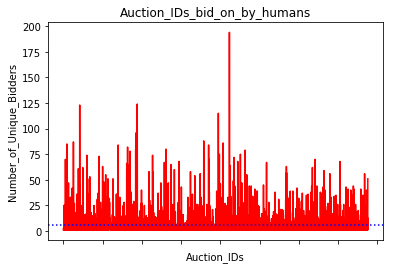

In [35]:
human_5[ "bidder_id" ].plot( color = 'r' )
plt.axhline( y = human_5[ 'bidder_id' ].mean( ) , color='b', linestyle=':')
plt.xlabel( 'Auction_IDs' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Auction_IDs_bid_on_by_humans' )

Text(0.5,1,'Auction_IDs_bid_on_by_bidders')

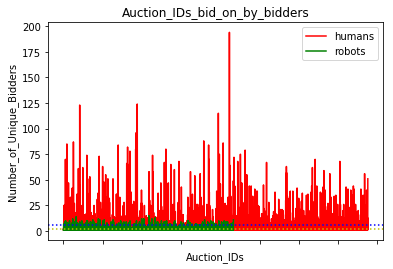

In [36]:
human_5[ "bidder_id" ].plot( color = 'r' , label = 'humans' )
robot_5[ "bidder_id" ].plot( color = 'g' , label = 'robots' )
plt.axhline( y = robot_5[ 'bidder_id' ].mean( ) , color='y', linestyle=':')
plt.axhline( y = human_5[ 'bidder_id' ].mean( ) , color='b', linestyle=':')
plt.legend( )
plt.xlabel( 'Auction_IDs' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Auction_IDs_bid_on_by_bidders' )

<p>Again, robots end up participating in a limited number of auctions as compared to humans.</p>

<h4>Countries</h4>
<p>We expect developed countries to have more robot bidders as compared to humans.</p>
<p>To inspect the same we plot the graph.</p>

In [37]:
robot_6 = robot.groupby( [ "country" ] ).nunique( )

human_6 = human.groupby( [ "country" ] ).nunique( )

Text(0.5,1,'Country_of_robots')

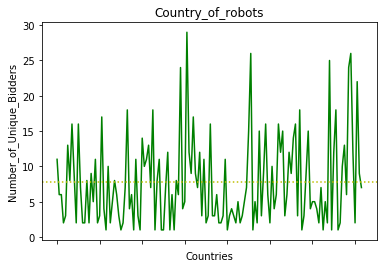

In [38]:
robot_6[ "bidder_id" ].plot( color = 'g' )
plt.axhline( y = robot_6[ 'bidder_id' ].mean( ) , color='y', linestyle=':')
plt.xlabel( 'Countries' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Country_of_robots' )

Text(0.5,1,'Country_of_humans')

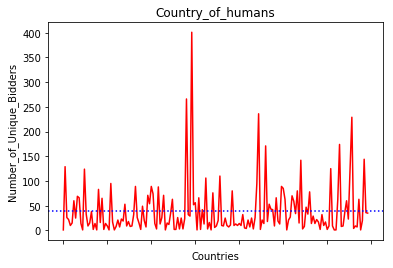

In [39]:
human_6[ "bidder_id" ].plot( color = 'r' )
plt.axhline( y = human_6[ 'bidder_id' ].mean( ) , color='b', linestyle=':')
plt.xlabel( 'Countries' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Country_of_humans' )

Text(0.5,1,'Country_of_bidders')

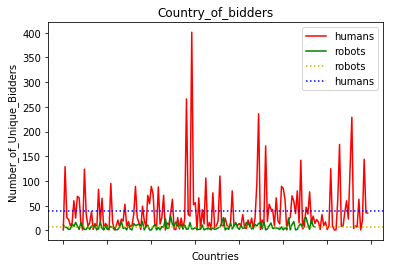

In [40]:
human_6[ "bidder_id" ].plot( color = 'r' , label = 'humans' )
robot_6[ "bidder_id" ].plot( color = 'g' , label = 'robots' )
plt.axhline( y = robot_6[ 'bidder_id' ].mean( ) , color='y', linestyle=':' , label = 'robots' )
plt.axhline( y = human_6[ 'bidder_id' ].mean( ) , color='b', linestyle=':' , label = 'humans' )
plt.legend( )
plt.xlabel( 'Countries' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Country_of_bidders' )

<p>Certain countries have only human bidders as compared to robots.</p>

<b>Variety of URLs</b>
<p>We expect the humans as well as robots to be equally likely for using any URL.</p>
<p>To inspect the same we plot the graph.</p>

In [41]:
robot_7 = robot.groupby( [ "url" ] ).nunique( )

human_7 = human.groupby( [ "url" ] ).nunique( )

Text(0.5,1,'URLs_of_bidding_Robots')

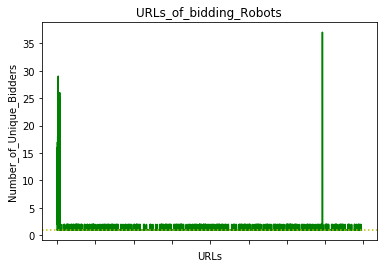

In [42]:
robot_7[ "bidder_id" ].plot( color = 'g' )
robot_6[ "bidder_id" ].plot( color = 'g' )
plt.axhline( y = robot_7[ 'bidder_id' ].mean( ) , color='y', linestyle=':')
plt.xlabel( 'URLs' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'URLs_of_bidding_Robots' )

Text(0.5,1,'URLs_of_bidding_Humans')

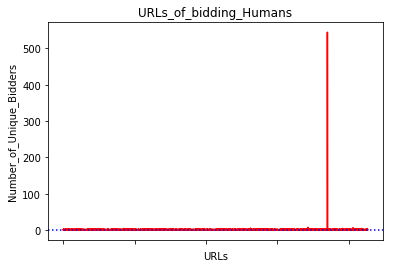

In [43]:
human_7[ "bidder_id" ].plot( color = 'r' )
plt.axhline( y = human_7[ 'bidder_id' ].mean( ) , color='b', linestyle=':')
plt.xlabel( 'URLs' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'URLs_of_bidding_Humans' )

Text(0.5,1,'URLs_of_bidding')

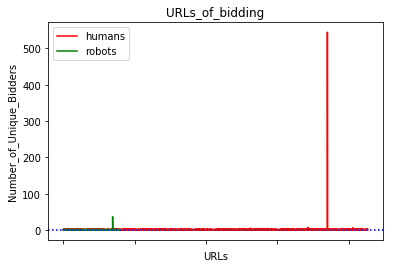

In [44]:
human_7[ "bidder_id" ].plot( color = 'r' , label = 'humans' )
robot_7[ "bidder_id" ].plot( color = 'g' , label = 'robots' )
plt.axhline( y = robot_7[ 'bidder_id' ].mean( ) , color='y', linestyle=':')
plt.axhline( y = human_7[ 'bidder_id' ].mean( ) , color='b', linestyle=':')
plt.legend( )
plt.xlabel( 'URLs' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'URLs_of_bidding' )

<p>We see the same pattern and some URLs are used only by humans and not robots.</p>

<b>Conclusion</b>
<p>We can apply decision tree or some other dimesionality reduction method and make sure that we restrict our dataset which is the intersection of conditions of all the features discussed until now. This will significantly scale down the dataset.</p>

<b>Payment_Accounts</b>
<p>Since the payment_accounts are obfuscated, we can't extract any features from the same. We expect humans to use multiple accounts but robots are likely to use just a single account.</p>
<p>To inspect the same we plot the graph.</p>

In [45]:
robot_9 = robot.groupby( [ "payment_account" ] ).nunique( )

human_9 = human.groupby( [ "payment_account" ] ).nunique( )

Text(0.5,1,'Payment_Accounts_of_robots')

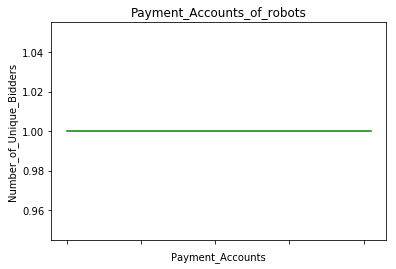

In [46]:
robot_9[ "bidder_id" ].plot( color = 'g' )
plt.xlabel( 'Payment_Accounts' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Payment_Accounts_of_robots' )

Text(0.5,1,'Payment_Accounts_of_humans')

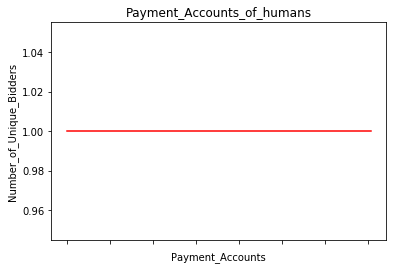

In [47]:
human_9[ "bidder_id" ].plot( color = 'r' )
plt.xlabel( 'Payment_Accounts' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Payment_Accounts_of_humans' )

Both Humans and Robots use 1 payment_account for all transactions, without any exception.

In [48]:
robot_11 = robot.groupby( [ "payment_account" ] ).nunique( )

human_11 = human.groupby( [ "payment_account" ] ).nunique( )

Text(0.5,1,'Payment_Accounts_of_robots')

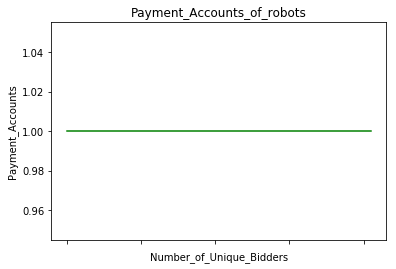

In [49]:
robot_11[ 'bidder_id' ].plot( color = 'g' )
plt.ylabel( 'Payment_Accounts' )
plt.xlabel( 'Number_of_Unique_Bidders' )
plt.title( 'Payment_Accounts_of_robots' )

Text(0.5,1,'Payment_Accounts_of_humans')

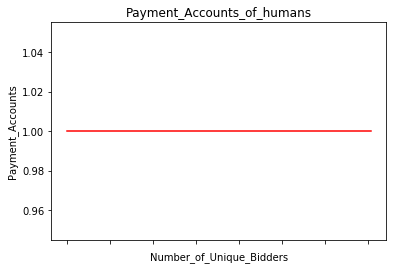

In [50]:
human_11[ 'bidder_id' ].plot( color = 'r' )
plt.ylabel( 'Payment_Accounts' )
plt.xlabel( 'Number_of_Unique_Bidders' )
plt.title( 'Payment_Accounts_of_humans' )

Every payment_account is unique to a single bidder_id(human or bot).

Therefore, we can say their is one-to-one mapping between payment_accounts and bidder_ids. This isn't parallel to our supposition.

<b>Address</b>
<p>Address are obfuscated as well. We expect humans to bid from multiple address and robots to be bidding from single address. Robots are likely to stay at one place, humans can easily move from place to place.</p>
<p>To inspect the same we plot the graph.</p>

In [51]:
robot_10 = robot.groupby( [ "address" ] ).nunique( )

human_10 = human.groupby( [ "address" ] ).nunique( )

Text(0.5,1,'Address_of_robots')

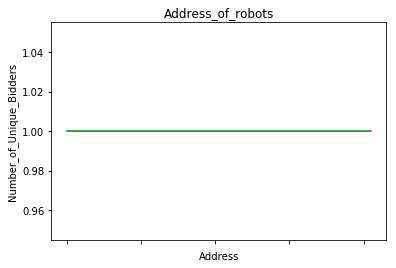

In [52]:
robot_10[ "bidder_id" ].plot( color = 'g' )
plt.xlabel( 'Address' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Address_of_robots' )

Text(0.5,1,'Address_of_humans')

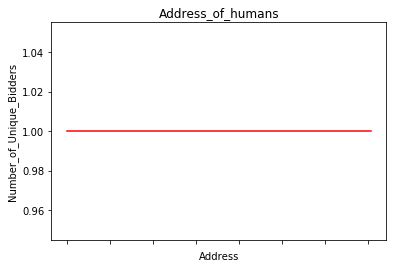

In [53]:
human_10[ "bidder_id" ].plot( color = 'r' )
plt.xlabel( 'Address' )
plt.ylabel( 'Number_of_Unique_Bidders' )
plt.title( 'Address_of_humans' )

Both Humans and Robots use 1 address(email) for all transactions, without any exception.

In [54]:
robot_12 = robot.groupby( [ "address" ] ).nunique( )

human_12 = human.groupby( [ "address" ] ).nunique( )

Text(0.5,1,'Address_of_robots')

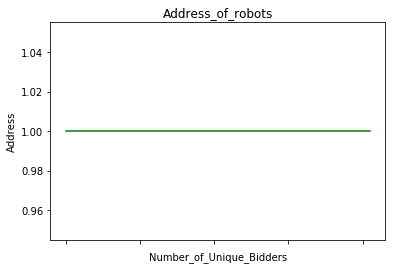

In [55]:
robot_12[ 'bidder_id' ].plot( color = 'g' )
plt.ylabel( 'Address' )
plt.xlabel( 'Number_of_Unique_Bidders' )
plt.title( 'Address_of_robots' )

Every address is unique to a single bidder_id(human or bot).

<p>Therefore, we can say their is one-to-one mapping between payment_accounts and bidder_ids. This isn't parallel to our supposition.</p>
<p>Thus, we can exclude them from features.</p>
<p>Since, IP, URL & Country seem related as well, we can work on their correlation as well.</p>

<h3>Response Time</h3>
<p>We calculate the response time of all the robots and humans and take their average to get the average response time.</p>
<p>Since, we already know that the average number of bids by robots are roughly thrice the number of humans, we expect their response time to be roughly one-third of the humans.</p>

In [70]:
len( robot_0 )

103

In [79]:
# since, the time has already been individually set to 0, we can say the sum of all offsets of an individual bidder, is 
# nothing but the time of their last bid. And dividing it by the number of bids, a person does, it gives the average 
# response time of the bidder. 
# Thereafter, summing it up and dividing it by number of unique bidders, gives the average response time of humans.
# And, the max value of individual response time is calculated.

temp_robot = 0.0
int_max_robot = 0.0

for t in robot_0 :
    temp = ( robot.loc[ robot[ "bidder_id" ] == t ] ).time.values
    temp_robot += temp[ len( temp ) - 1 ] / len( temp )
    if( int_max < temp[ len( temp ) - 1 ] ) :
        int_max_robot = temp_robot

temp_robot /= len( robot_0 )
temp_robot

248335379729.4257

Average Response time of robots : 2.48e11.

In [82]:
# since, the time has already been individually set to 0, we can say the sum of all offsets of an individual bidder, is 
# nothing but the time of their last bid. And dividing it by the number of bids, a person does, it gives the average 
# response time of the bidder. 
# Thereafter, summing it up and dividing it by number of unique bidders, gives the average response time of humans.
# And, the max value of individual response time is calculated.

temp_human = 0.0
int_max_human = 0

for t in human_0 :
    temp = human.loc[ human[ "bidder_id" ] == t ].time.values
    temp_human += temp[ len( temp ) - 1 ] / len( temp )
    if( int_max < temp[ len( temp ) - 1 ] ) :
        int_max_human = temp_human

temp_human /= len( human_0 )
temp_human

931288975983.3068

Average Response time of humans : 9.31e11.

Since, we can had average number of bids for robots was almost 3 ( 1466 / 490 ), we can justify the fact that the ratio of time response of humans and robots is close to 3.66 ( 9.31 / 2.48 ).

<h3>Dimensionality Reduction</h3>
<p><b>Low Variance Filter</b></p>
<p>Deleting the <i>payment account</i> and <i>address</i> columns from the robots and humans dataset, because they don't carry any additional information besides the bidder_id. And they are obfuscated as well. So, to simplify the dataset, it is removed.</p>

In [18]:
filtered_robot = robot
del filtered_robot[ 'payment_account' ]
del filtered_robot[ 'address' ]

In [19]:
filtered_human = human
del filtered_human[ 'payment_account' ]
del filtered_human[ 'address' ]

<b>Label Encoder</b>
<p>We try to transform nominal code(country) to respective numerical code for the country. The numerical distance issue between countries still remain.</p>
<p>Devices, Auction_IDs, Merchandise can be Huffman encoded to simplify them.(assign symbols with more frequency smaller symbol)</p>

<b>Combining Levels</b>
<p>It may seem that since, the IPs and URLs are obfuscated so they can be removed as well from the feature space. But, still their might be a possibility of correlation between the two and the country as well. So, we try to implement combining levels.</p>

<b>Decision Trees</b>
<p>We can apply decision trees on the countries( ip's, url's ), phone devices, response_time, merchandise and even auction_ids.</p>

Merging values of the Sample_Bids and the test_data_set

Low Variance Filtering

Using Response Time of Humans and Robots as a derived feature.

In [12]:
unique_bidder_id = merged[ "bidder_id" ].unique( )
bidders_0 = merged[ "bidder_id" ].unique( )

In [13]:
#replace time of each bidder by its response time.
for t in unique_bidder_id :
    merged.loc[ merged[ 'bidder_id' ]==t ].time -= merged.loc[ merged[ 'bidder_id' ]==t ].time.min()
for t in bidders_0 :
    temp = ( merged.loc[ merged[ "bidder_id" ] == t ] ).time.values
    merged.loc[ merged[ "bidder_id" ] == t ].time = temp[ len( temp ) - 1 ] / len( temp )

C:\Users\srajpal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<h4>Machine Learning</h4>

<h5>Labels</h5>

In [15]:
y = merged[ "outcome" ]
y

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
410159    1
410160    1
410161    0
410162    0
410163    0
410164    0
410165    0
410166    0
410167    0
410168    0
410169    0
410170    0
410171    0
410172    0
410173    0
410174    0
410175    0
410176    0
410177    0
410178    0
410179    0
410180    0
410181    0
410182    1
410183    0
410184    0
410185    0
410186    0
410187    0
410188    0
Name: outcome, Length: 410189, dtype: int64

<h5>Training Dataset</h5>
<p>Add features necessary for the classification.</p>

In [93]:
#converting strings to categorical codes.
X = merged[ [ 'url' , 'ip' , 'device' , 'country' , 'merchandise' , 'auction' , 'time' ] ]
X.auction = pd.Categorical( X.auction )
X[ 'auction' ] = X.auction.cat.codes
X.merchandise = pd.Categorical( X.merchandise )
X[ 'merchandise' ] = X.merchandise.cat.codes
X.device = pd.Categorical( X.device )
X[ 'device' ] = X.device.cat.codes
X.country = pd.Categorical( X.country )
X[ 'country' ] = X.country.cat.codes
X.ip = pd.Categorical( X.ip )
X[ 'ip' ] = X.ip.cat.codes
X.url = pd.Categorical( X.url )
X[ 'url' ] = X.url.cat.codes

C:\Users\srajpal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\srajpal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\srajpal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Replacing the Nan values with the Mode values, because mean and median maynot be a wise option for the categorical coded values. For response_time, we can use the median values.

In [111]:
#converting column to array and feeding the median value.
time = np.array( X[ "time" ] )
for i in range( 410189 ) :
    if ( np.isnan( time[ i ] ) ) :
        time[ i ] = 3.040000e+12

In [112]:
#converting column to array and feeding the mode value.
url = np.array( X[ "url" ] )
for i in range( 410189 ) :
    if ( url[ i ] == -1 ) :
        url[ i ] = 87862

In [113]:
#converting column to array and feeding the mode value.
ip = np.array( X[ "ip" ] )
for i in range( 410189 ) :
    if ( ip[ i ] == -1 ) :
        ip[ i ] = 143475

In [114]:
#converting column to array and feeding the mode value.
device = np.array( X[ "device" ] ) 
for i in range( 410189 ) :
    if ( device[ i ] == -1 ) :
        device[ i ] = 2436

In [115]:
#converting column to array and feeding the mode value.
country = np.array( X[ "country" ] ) 
for i in range( 410189 ) :
    if ( country[ i ] == -1 ) :
        country[ i ] = 73

In [116]:
#converting column to array and feeding the mode value.
merchandise = np.array( X[ "merchandise" ] ) 
for i in range( 410189 ) :
    if ( merchandise[ i ] == -1 ) :
        merchandise[ i ] = 9

In [117]:
#converting column to array and feeding the mode value.
auction = np.array( X[ "auction" ] ) 
for i in range( 410189 ) :
    if ( auction[ i ] == -1 ) :
        auction[ i ] = 2233

In [118]:
#converting arrays to dataframe.
url = pd.DataFrame( url )
ip = pd.DataFrame( ip )
device = pd.DataFrame( device )
country = pd.DataFrame( country )
merchandise = pd.DataFrame( merchandise )
auction = pd.DataFrame( auction )
time = pd.DataFrame( time )

In [119]:
#appending features
X = pd.concat( [ device , country , merchandise , url , ip , time , auction ] , axis = 1 )
X.columns = [ "device" , "country" , "merchandise" , "url" , "ip" , "time" , "auction" ]
#del X_train[ "time" ]

Splitting the dataset into training and test.

In [120]:
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.3 , random_state = 7 )

<b>XGBoosting</b>

Tuning all the parameters for the feature set.

In [121]:
model = XGBClassifier( base_score = 0.5 , booster='gbtree', colsample_bylevel = 1 ,
       colsample_bytree = 1 , gamma = 0 , learning_rate = 0.097 , max_delta_step = 0 ,
       max_depth = 12 , min_child_weight = 0.8 , missing = None, n_estimators = 100 ,
       n_jobs = 1 , nthread = None , objective = 'binary:logistic' , random_state = 3 ,
       reg_alpha = 0 , reg_lambda = 1 , scale_pos_weight = 1 , seed = None ,
       silent = True , subsample = 1 )
model.fit( X_train , y_train )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.097, max_delta_step=0,
       max_depth=12, min_child_weight=0.8, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=3,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [122]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict( X_test )
predictions = [ round(value) for value in y_pred ]
# evaluate predictions
accuracy = accuracy_score( y_test , predictions )
score = 100 * roc_auc_score( predictions , y_test )
print( "Score : %.2f%%" % score )
print( "Accuracy: %.2f%%" % (accuracy * 100.0))

Score : 91.25%
Accuracy: 92.82%


C:\Users\srajpal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<b>Random Forest Classifier</b>

Tuning all the parameters for the feature set.

In [123]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=24, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2 ,
            min_weight_fraction_leaf=0.0,n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
clf.fit( X_train , y_train ) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=24, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [125]:
y_pred = clf.predict( X_test )
predictions = [ round( value ) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score( y_test , predictions )
score = 100*roc_auc_score( predictions , y_test )
print( "Score : %.2f%%" % score )
print( "Accuracy: %.2f%%" % (accuracy * 100.0))

Score : 90.89%
Accuracy: 91.84%


<b>Bagging Trees</b>

Tuning all the parameters for the feature set.

In [126]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
model = BaggingClassifier( base_estimator = cart , n_estimators = 100 , random_state = 7 )
results = model_selection.cross_val_score( model , X_train , y_train , cv = 3 )
model.fit( X_train , y_train )

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [127]:
y_pred = model.predict( X_test )
predictions = [ round( value ) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score( y_test , predictions )
score = 100*roc_auc_score( predictions , y_test )
print( "Score : %.2f%%" % score )
print( "Accuracy: %.2f%%" % (accuracy * 100.0))

Score : 88.60%
Accuracy: 92.65%


<p>Accuracy of all the 3 models I tried are very close:</p>
<ul>
  <li>XGBoosting</li>
  <li>Random Forest Classifier</li>
  <li>Bagging Classifier</li>
</ul>
<p>But if, score is considered alongside, the best algorithm among them would be : <b>XGBoosting</b>.</p>